## (40%) Collaboraitve Filtering Movie Recommendation

In [1]:
#A Dictionary of movie critics and their ratings of a small set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

### Suppose we are given a data set above of each customrs' rating to each movie with sacle 0-5. Stored as python dictinary format. Can you write a function with inputs of rating data and two persons, return their similarity measured by Pearson correlation. You may define and implment other similarity measure also. (10%). 

#### Solutions

In [2]:
from math import sqrt

def similarity_PC(critics, key1, key2):
    n = 0
    sigma_xy = 0
    sigma_x = 0
    sigma_x2 = 0
    sigma_y = 0
    sigma_y2 = 0
    for value in critics[key1]:
        if value in critics[key2]:
            n +=1
            sigma_x += critics[key1][value]
            sigma_x2 += pow(critics[key1][value],2)
            sigma_y += critics[key2][value]
            sigma_y2 += pow(critics[key2][value],2)
            sigma_xy += (critics[key1][value]*critics[key2][value])
    if(n==0):
        return 0
    numerator = n*sigma_xy - sigma_x*sigma_y
    denominator = sqrt((n*sigma_x2 - pow(sigma_x,2))*(n*sigma_y2 - pow(sigma_y,2)))
    r = numerator/denominator
    return r

### Given a person, say A, could you write a function to return top n persons most similar to A (exclude A) (5%)? 
### Same dataset as above.

#### Solutions

In [3]:
def top_n_similar_items1(critics, target_key, n):
    priority = []
    temp = []
    for key in critics:
        if(key == target_key):
            continue
        r = similarity_PC(critics, target_key, key)
        temp.append(key)
        temp.append(r)
        priority.append(temp)
    return priority[0:n]

### Given a person, say A, could you write a function to recommend those unseen movies? (10%)

#### Solutions

In [4]:
def recommended_items1(critics, target_key):
    numerator = {}
    denominator = {}
    priority = {}
    for key in critics:
        if(key == target_key):
            continue
        r = similarity_PC(critics, target_key, key)
        if(r<0):
            continue
        for value in critics[key]:
            if value not in critics[target_key]:
                numerator.setdefault(value,0)
                numerator[value] += critics[key][value]*r
                denominator.setdefault(value,0)
                denominator[value] += r
    for key in numerator:
        a = (numerator[key]/denominator[key])
        priority[key] = a
    return priority

### Let's using another approach, can you write a function to return top n most similair movies for a given movie? (5%) 

#### Solutions

In [5]:
def convert_dict(critics):
    # this function converts keys into values and vice-versa
    converted = {}
    for key in critics:
        for value in critics[key]:
            converted.setdefault(value, {})
            converted[value][key] = critics[key][value]
    return converted

def top_n_similar_items2(critics, x, n):
    # x is the given movie
    converted = convert_dict(critics)
    priority = top_n_similar_items1(converted, x, n)
    return priority

### Given a movie, say B, could you write a function to recommend those peoples who have not seen this movies but they may rank this movie with high score? For example, who are those two persons who will rate "Just My Luck" high but they never seen this movie before? (10%)

#### Solutions

In [6]:
def recommended_items2(critics, x):
    # x is the given movie
    converted = convert_dict(critics)
    priority = recommended_items1(converted, x)
    return priority

### (20%) Data Preparation

### 1. Data quality can be assessed in terms of accuracy, completeness, and consistency. What other factors are also important to data quality (5%)? 

#### Solutions


In [7]:
"""
Relevance, Accessibility, Clarity and Timeliness are some factors which are as important as Accuracy, completeness and
consistency when it comes to the evaluation of Data Quality.
"""

'\nRelevance, Accessibility, Clarity and Timeliness are some factors which are as important as Accuracy, completeness and\nconsistency when it comes to the evaluation of Data Quality.\n'

### 2.  Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70  (10%).

(a) What is the mean of the data? What is the median?

(b) What is the mode of the data? Comment on the data's modality (i.e., bimodal, trimodal, etc.).

(c) What is the midrange of the data?

(d) Can you find (roughly) the first quartile (Q1) and the third uartile (Q3) of the data? 

(e) Give the five-number summary, minimum, Q1, median, Q3, maximum, of the data.

(f) Show a boxplot of the data from (e).

(g) How is a quantile-quantile plot different from a quantile plot? (The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.  A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.)

#### Solution


'\n(g). As given, The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations\nwith a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second\ndata set.\nWhereas, Normal quantile plots are a way of looking at a data set to see if it seems reasonable that it may be a sample from a\nnormally distributed population or procedure. Its basic idea is to compare the data values with the values one would predict\nfor a standard normal distribution.\n'

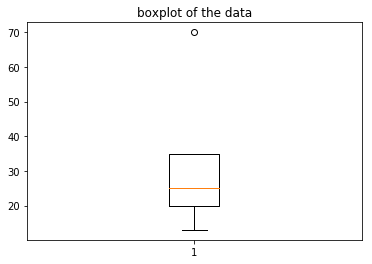

In [9]:
"""(a). mean = (sum of all the age values)/(Number of data)
          = 807/27 = 30 (approx.)
    median = middle value of the ordered list = 25
    
(b). Mode = value occurs with highest frequency = 25 and 35
     This dataset has 2 values which has same highest frequency that is why this dataset is Bimodal.
    
(c). midrange = (smallest value + largest value)/2 = (13+70)/2
              = 41.5
    
(d). First quartile(Q1) = 25th percentile = 20
     Third quartile(Q3) = 75th percentile = 35
    
(e). The five number summary:
     (minimum, Q1, median, Q3, maximum) = (13, 20, 25, 35, 70)"""
        
#(f). box plot of the data

import numpy as np
import matplotlib.pyplot as plt

data = np.concatenate(([13], [20], [25], [35], [70]))
x,y = plt.subplots()
y.set_title('boxplot of the data')
y.boxplot(data)

"""
(g). As given, The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations
with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second
data set.
Whereas, Normal quantile plots are a way of looking at a data set to see if it seems reasonable that it may be a sample from a
normally distributed population or procedure. Its basic idea is to compare the data values with the values one would predict
for a standard normal distribution.
"""

### 3. In practical data, tuples with missing values for some attributes are a common occurrence. Describe various methods for handling this problem (5%) .

#### Solutions


In [10]:
"""
Choosing the right method depends on the problem domain, data domain and our goal for data mining process. Following are some
methods which can be used to deal this problem-
1). If we have huge dataset, and some values are missing then ignore the data row. 
2). Use a global constant to fill in for missing values like unknown, N/A etc.
3). If data is not huge, then use attribute mean for the missing values
4). If particular column has different classes like rich and poor. Use attribute mean for all samples belonging to the same
class. For example missing value belongs to rich class, take mean of all the values that belongs to rich class only.
5). Use a data mining algorithm to predict the most probable value
"""

'\nChoosing the right method depends on the problem domain, data domain and our goal for data mining process. Following are some\nmethods which can be used to deal this problem-\n1). If we have huge dataset, and some values are missing then ignore the data row. \n2). Use a global constant to fill in for missing values like unknown, N/A etc.\n3). If data is not huge, then use attribute mean for the missing values\n4). If particular column has different classes like rich and poor. Use attribute mean for all samples belonging to the same\nclass. For example missing value belongs to rich class, take mean of all the values that belongs to rich class only.\n5). Use a data mining algorithm to predict the most probable value\n'

## (30%) How to Acquire & Refine the Data


## Items, Users, Signal

- **Items**: Objects to be recommended
- **Users**: Target of the recommendation
- **Signal**: Explicit or Implicit feedback between Items and users

In our context
- Items are **stories** posted on HN
- Users are **users** commenting or posting stories
- Signal are **comments** on the stories by the user signalling interest

## Source of Data 

Lets see the sources for getting historical information posted on HackerNews

- **HackerNews API** - YCombinator provides an official hackernew api through Firebase. This is a near real-time database and provides both an *items* (stories and comments) as well as an *users* api.  It is available at https://github.com/HackerNews/API

- **BigQuery** : Google Big Query has a daily updated HackerNews public dataset available (from 2006 to date). It only has *items* information. It is available at https://bigquery.cloud.google.com/table/bigquery-public-data:hacker_news.full

## Items (Stories) 

The schema for the Big Query table is

| Field       | Type      | Description                           |
|:------------|----------:|:--------------------------------------|
| by          | STRING    | The username of the item's author.    |
| score       | INTEGER   | Story score                           |
| time        | INTEGER   | Unix time                             |
| timestamp   | TIMESTAMP | Timestamp for the unix time           |
| title       | STRING    | Story title                           |
| type        | STRING    | Type of details (comment, story, ...) |
| url         | STRING    | Story url                             |
| text        | STRING    | Story or comment text                 |
| parent      | INTEGER   | Parent comment ID                     |
| deleted     | BOOLEAN   | Is deleted?                           |
| dead        | BOOLEAN   | Is dead?                              |
| descendants | INTEGER   | Number of story or poll descendants   |
| id          | INTEGER   | The item's unique id.                 |
| ranking     | INTEGER   | Comment ranking                       |


- Get all the stories posted on HackerNews in **2017 (till date)**. 
- To ensure a relevant set, we will limit the stories which have atleast have **score of 5 points or more** on them. 

This dataset is available in `stories2017score5.gzip`

### Could you read file stories2017score5.csv.gzip by Python pandas package and plot histogram of scores(10%) 

#### Solutions

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_frame = pd.read_csv('C:/Akshata/Courses/summer19/large_scale_analytics/stories2017score5.csv.gzip', compression='gzip', 
                         header=0, sep=',', quotechar='"')
data_frame.shape

(56757, 14)

In [12]:
data_frame.head()

,by,score,time,timestamp,title,type,url,text,parent,deleted,dead,descendants,id,ranking
0,edsouza,5,1510895219,2017-11-17 05:06:59 UTC,Meet the Tesla Semitruck,story,https://www.wired.com/story/tesla-truck-revealed/,NaN,NaN,NaN,True,NaN,15719098,NaN
1,mathchick,5,1495226520,2017-05-19 20:42:00 UTC,Raising Rebel Girls,story,https://code.likeagirl.io/raising-rebel-girls-...,NaN,NaN,NaN,True,NaN,14379186,NaN
2,jscholes,5,1498940583,2017-07-01 20:23:03 UTC,Woman accidentally kills her boyfriend in atte...,story,https://arstechnica.com/tech-policy/2017/06/in...,NaN,NaN,NaN,True,NaN,14678802,NaN
3,huangc10,5,1510186454,2017-11-09 00:14:14 UTC,Coinbase is Down,story,https://www.coinbase.com/,NaN,NaN,NaN,True,NaN,15658508,NaN
4,calebgarling,5,1513012293,2017-12-11 17:11:33 UTC,Was Donald Trump a Robot?,story,https://shorterletter.com/was-donald-trump-a-r...,NaN,NaN,NaN,True,NaN,15898391,NaN


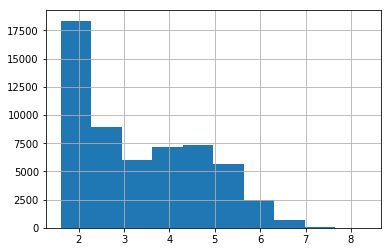

In [13]:
np.log(data_frame.score).hist()

### Most Popular Stories (5%)

For this exercise:
- Let us choose the most popular stories with a score > 500 over the last year
- Lets keep the columns - user (by), userId (id), score (score), title (title)


#### Solutions

In [14]:
score_gt_500 = data_frame[data_frame.score>500]
score_gt_500 = score_gt_500[['by','id','score','title']]
score_gt_500.head()

,by,id,score,title
1908,appoets,14274033,503,"Uber is valued at $70B, you can get it at $999"
15284,djyaz1200,14107522,547,Jeff Bezos’ Annual Letter
15291,SimplyUseless,13647190,671,India has banned disposable plastic in Delhi
15296,kungfudoi,13309610,511,Startup Puts Everything You Need for a Two-Acr...
15297,dantiberian,13860890,1089,The Uber Bombshell About to Drop


###  Item (Story) - User - Signal (Comment) Lets get all the comments from the database by reviewing fifle (bycomments2017score5.csv.gz) and keep only the user and story information. Please see what problems in data and dealing with them. Show me processed data shapes (how many rows and column) and first five rows of  processed data (5%).




#### Solutions

In [15]:
bycomments = pd.read_csv('C:/Akshata/Courses/summer19/large_scale_analytics/bycomments2017score5.csv.gz', compression='gzip', 
                         header=0, sep=',', quotechar='"')
bycomments.shape

(450884, 2)

In [16]:
bycomments.head()

,by,parent
0,NaN,15332819
1,NaN,15361981
2,NaN,13939068
3,NaN,15773920
4,NaN,15824599


In [17]:
bycomments.dropna(inplace = True)
bycomments.columns = ['user', 'story']
bycomments.head()

,user,story
13153,05,15878548
13154,0a,13850516
13155,1k,15783427
13156,1k,14602595
13157,21,14192353


In [18]:
UserAndStory = bycomments[bycomments['story'].isin(score_gt_500.id)]
UserAndStory.shape

(52460, 2)

In [19]:
UserAndStory.head()

,user,story
13173,21,14356377
13181,21,15131370
13189,21,15196309
13210,47,15601729
13211,47,14023198


### Users information (10%). 

We need to get the details for all the users that have made comments in our list of stories.

Also, we are interested in their details
- How long have they been on the HN platform? (Created)
- How active they are? (# of comments)?
- How good they are to the HN community (karma)?

We will need to get the User Information from HN

- **Hacker News API**: Official API hosted on Firebase - https://github.com/HackerNews/API
- **Haxor**: Unofficial HN Python API c- https://github.com/avinassh/haxor
- **Ascynio-HN**: A very fast async Python API for HackerNews - https://github.com/itielshwartz/asyncio-hn

### Think how you use API to get all uses data information. Download them and save them. Will be used later.

#### Solutions

In [31]:
import requests
import json

data = {}
def getAllUserInfo(UserAndStory): 
    for user in UserAndStory.user.unique():
        r = requests.get("https://hacker-news.firebaseio.com/v0/user/"+user+".json?print=pretty")
        if r.status_code == 200:
            temp = r.json()
            if temp.get("submitted", 0) == 0:
                print(temp)
            else:
                data[user] = [temp["created"], temp["karma"], len(temp["submitted"])]
    
    df = pd.DataFrame.from_dict(data,orient="index")
    df.to_csv("C:/Akshata/Courses/summer19/large_scale_analytics/data.csv")
    return

getAllUserInfo(UserAndStory)

{'created': 1465952019, 'id': 'voycey', 'karma': 166}


## (30%) Feature Engineering (Data Transform)

How do we create the user-item matrix for the HackerNews Dataset
- OneHot Encoding
- Sparse Matrix (for scalability)

### What is OneHot Encoding and its purpose (5%). Could you apply OneHot to encode previous obtained story user comment data from bycomments2017score5.csv.gz ? Show encoded data previous few rows. (10%)

#### Solutions:



In [10]:
"""
One hot encoding is a process by which categorical variables are converted into a form that could be provided to Machine
Learning algorithms to do a better job in prediction. We use one hot encoder to perform “binarization” of the category and
include it as a feature to train the model.
"""

UserAndStory.head()

,user,story
13173,21,14356377
13181,21,15131370
13189,21,15196309
13210,47,15601729
13211,47,14023198


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def oneHotEncoding(UserAndStory):
    #data = {}
    pd.options.mode.chained_assignment = None  # default='warn'

    label_story = LabelEncoder()
    UserAndStory['label_story'] = label_story.fit_transform(UserAndStory.story)
    
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    data = enc.fit_transform(UserAndStory.label_story.values.reshape(-1,1))
    dataFrame = pd.DataFrame(data)
    return dataFrame

UserAndStory_cp = UserAndStory.copy()
data = oneHotEncoding(UserAndStory_cp)
data.head()

#UserAndStory.head()

,0,1,2,3,4,5,6,7,8,9,...,959,960,961,962,963,964,965,966,967,968
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Could you what is Coordinate list (COO) compression format for sparse matrix generation (5%)
### Implment this to compress previous obtained story user comment data from bycomments2017score5.csv.gz (10%).

#### Solutions



In [1]:
"""
Coordinate list format(COO) stores data as a list of tuple with three elements as follows (the tuple is present only for
non-zero elements)-
1st element -> row index
2nd element -> column index
3rd element -> value to be stored in the row and column

Advantages: * We can construct the sparse matrix fast
            * We can convert the COO sparse matrix to other sparse matrix formats like Compressed Sparse Row matrix (CSR) and
              Compressed Sparse Column matrix (CSC).
"""

'\nCoordinate list format(COO) stores data as a list of tuple with three elements as follows (the tuple is present only for\nnon-zero elements)-\n1st element -> row index\n2nd element -> column index\n3rd element -> value to be stored in the row and column\n\nAdvantages: * We can construct the sparse matrix fast\n            * We can convert the COO sparse matrix to other sparse matrix formats like Compressed Sparse Row matrix (CSR) and\n              Compressed Sparse Column matrix (CSC).\n'

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def oneHotEncoding_Sparse(UserAndStory):
    pd.options.mode.chained_assignment = None  # default='warn'

    label_story = LabelEncoder()
    UserAndStory['label_story'] = label_story.fit_transform(UserAndStory.story)
    
    enc = OneHotEncoder(handle_unknown='ignore', sparse=True)
    data = enc.fit_transform(UserAndStory.label_story.values.reshape(-1,1))
    #dataFrame = pd.DataFrame(data)
    return data

UserAndStory_cp = UserAndStory.copy()
data = oneHotEncoding_Sparse(UserAndStory_cp)
print(data)

  (0, 409)	1.0
  (1, 678)	1.0
  (2, 700)	1.0
  (3, 847)	1.0
  (4, 284)	1.0
  (5, 363)	1.0
  (6, 771)	1.0
  (7, 571)	1.0
  (8, 610)	1.0
  (9, 644)	1.0
  (10, 744)	1.0
  (11, 900)	1.0
  (12, 149)	1.0
  (13, 552)	1.0
  (14, 803)	1.0
  (15, 435)	1.0
  (16, 555)	1.0
  (17, 826)	1.0
  (18, 281)	1.0
  (19, 198)	1.0
  (20, 422)	1.0
  (21, 533)	1.0
  (22, 572)	1.0
  (23, 851)	1.0
  (24, 434)	1.0
  :	:
  (52435, 712)	1.0
  (52436, 683)	1.0
  (52437, 644)	1.0
  (52438, 507)	1.0
  (52439, 434)	1.0
  (52440, 221)	1.0
  (52441, 121)	1.0
  (52442, 946)	1.0
  (52443, 593)	1.0
  (52444, 119)	1.0
  (52445, 329)	1.0
  (52446, 219)	1.0
  (52447, 715)	1.0
  (52448, 910)	1.0
  (52449, 739)	1.0
  (52450, 840)	1.0
  (52451, 668)	1.0
  (52452, 702)	1.0
  (52453, 653)	1.0
  (52454, 681)	1.0
  (52455, 694)	1.0
  (52456, 226)	1.0
  (52457, 29)	1.0
  (52458, 706)	1.0
  (52459, 838)	1.0
